In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0               Player   Nation    Pos  \
0              0    Maximilian Arnold   de GER     MF   
1              1      Nathaniel Clyne  eng ENG     DF   
2              2      Trevoh Chalobah  eng ENG     DF   
3              3       Atakan Karazor   de GER     MF   
4              4           Saša Lukić   rs SRB     MF   
...          ...                  ...      ...    ...   
1491        2490  Filippo Terracciano   it ITA  DF,FW   
1492        2495       Jonathan Viera   es ESP     MF   
1493        2496       Alan Virginius   fr FRA     FW   
1494        2505       Bryan Zaragoza   es ESP  FW,MF   
1495        2507         Nadir Zortea   it ITA     DF   

                            Squad  \
0                       Wolfsburg   
1                  Crystal Palace   
2                 Chelsea+Lorient   
3                       Stuttgart   
4     Fulham+Fulham+Torino+Torino   
...                           ...   
1491          Hellas Verona+Milan   
1492           Las Palmas+Almería   
1493          Lille+Clermont Foot   
1494        Granada+Bayern Munich   
1495           Frosinone+Atalanta   

                                                   Comp  Age    Born     MP  \
0                                         de Bundesliga  0.0  1994.0  126.0   
1                                    eng Premier League  0.0  1991.0   70.0   
2                         eng Premier League+fr Ligue 1  0.0  1999.0   87.0   
3                                         de Bundesliga  0.0  1996.0  105.0   
4     eng Premier League+eng Premier League+it Serie...  0.0  1996.0  119.0   
...                                                 ...  ...     ...    ...   
1491                                         it Serie A  0.0  2003.0   21.0   
1492                                         es La Liga  0.0  1989.0   21.0   
1493                                         fr Ligue 1  0.0  2003.0   16.0   
1494                           es La Liga+de Bundesliga  0.0  2001.0   28.0   
1495                                         it Serie A  0.0  1999.0   19.0   

      Starts    Min    90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0      123.0  10852  120.5         0.11       0.22        0.09          0.19   
1       61.0   5474   60.8         0.00       0.03        0.00          0.03   
2       69.0   6246   69.5         0.09       0.13        0.09          0.13   
3       86.0   7520   83.5         0.00       0.07        0.00          0.07   
4       88.0   7817   86.9         0.13       0.17        0.08          0.13   
...      ...    ...    ...          ...        ...         ...           ...   
1491    15.0   1372   15.2         0.00       0.07        0.00          0.07   
1492    19.0   1529   17.0         0.12       0.35        0.00          0.24   
1493    13.0   1005   11.2         0.00       0.18        0.00          0.18   
1494    19.0   1821   20.2         0.30       0.40        0.25          0.35   
1495    14.0   1407   15.7         0.13       0.45        0.13          0.45   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.08          0.23        0.05            0.20                61.0   
1         0.01          0.04        0.01            0.04                40.0   
2         0.05          0.07        0.05            0.07                76.0   
3         0.02          0.08        0.02            0.07                85.0   
4         0.11          0.19        0.08            0.16                95.0   
...        ...           ...         ...             ...                 ...   
1491      0.02          0.02        0.02            0.02                31.0   
1492      0.21          0.59        0.12            0.36                41.0   
1493      0.12          0.15        0.12            0.15                24.0   
1494      0.21          0.32        0.17            0.27               145.0   
1495      0.03          0.19        0.03            0.19                52.0   

     

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['MF'])]
newbie = newbie[newbie['Pos'].isin(['MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['MF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['MF'])]

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [5]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

Unnamed: 0                      Player   Nation Pos  \
0             5           Salis Abdul Samed   gh GHA  MF   
1             7             Laurent Abergel   fr FRA  MF   
2            28                 Yacine Adli   fr FRA  MF   
3            31            Michel Aebischer   ch SUI  MF   
4            62                Luis Alberto   es ESP  MF   
5            66               Rubén Alcaraz   es ESP  MF   
6            68                  Iván Alejo   es ESP  MF   
7            69                Carles Aleñá   es ESP  MF   
8            85               Edson Álvarez   mx MEX  MF   
9           108              Benjamin André   fr FRA  MF   
10          126            Oliver Arblaster  eng ENG  MF   
11          139           Maximilian Arnold   de GER  MF   
12          167             Neil El Aynaoui   fr FRA  MF   
13          173                Iddrisu Baba   gh GHA  MF   
14          178                Milan Badelj   hr CRO  MF   
15          189            Tiemoué Bakayoko   fr FRA  MF   
16          217              Nicolò Barella   it ITA  MF   
17          219                Ross Barkley  eng ENG  MF   
18          222    Leandro Barreiro Martins   lu LUX  MF   
19          223            Enzo Barrenechea   ar ARG  MF   
20          225               Pablo Barrios   es ESP  MF   
21          231                  Toma Bašić   hr CRO  MF   
22          265             Jude Bellingham  eng ENG  MF   
23          269                Fran Beltrán   es ESP  MF   
24          274            Carlos Benavídez   uy URU  MF   
25          275             Ismaël Bennacer   dz ALG  MF   
26          279              Nabil Bentaleb   dz ALG  MF   
27          280           Rodrigo Bentancur   uy URU  MF   
28          288                Sander Berge   no NOR  MF   
29          308              Philip Billing   dk DEN  MF   
30          313               Yves Bissouma   ml MLI  MF   
31          314        Leonardo Bittencourt   de GER  MF   
32          316              Antonio Blanco   es ESP  MF   
33          321                 Alexis Blin   fr FRA  MF   
34          333               Daniel Boloca   ro ROU  MF   
35          335         Giacomo Bonaventura   it ITA  MF   
36          337                Warren Bondo   fr FRA  MF   
37          357             Hicham Boudaoui   dz ALG  MF   
38          363                Edoardo Bove   it ITA  MF   
39          384           Marco Brescianini   it ITA  MF   
40          396              Josh Brownhill  eng ENG  MF   
41          422              Moisés Caicedo   ec ECU  MF   
42          423                 Tom Cairney  sct SCO  MF   
43          424                Jens Cajuste   se SWE  MF   
44          430            Hakan Çalhanoğlu   tr TUR  MF   
45          433               Lamine Camara   sn SEN  MF   
46          434                Mahdi Camara   fr FRA  MF   
47          435              Mohamed Camara   ml MLI  MF   
48          452              Étienne Capoue   fr FRA  MF   
49          456            Maxence Caqueret   fr FRA  MF   
50          464              Johnny Cardoso   us USA  MF   
51          484       Cristian Cásseres Jr.   ve VEN  MF   
52          493              Danilo Cataldi   it ITA  MF   
53          528            Pedro Chirivella   es ESP  MF   
54          531               Joris Chotard   fr FRA  MF   
55          535               Ryan Christie  sct SCO  MF   
56          539                  Pathé Ciss   sn SEN  MF   
57          547                Jordan Clark  eng ENG  MF   
58          563              Santi Comesaña   es ESP  MF   
59          569                  Lewis Cook  eng ENG  MF   
60          572            Francis Coquelin   fr FRA  MF   
61          585      David Pereira da Costa   pt POR  MF   
62          589                  Samu Costa   pt POR  MF   
63          593           Lassana Coulibaly   ml MLI  MF   
64          615                 Josh Cullen   ie IRL  MF   
65          632                      Danilo  

In [6]:
Muller_2021=player_2021[player_2021['Player']=='Thomas Müller']
Muller_2021

Unnamed: 0         Player  Nation Pos          Squad           Comp  \
215      1819.0  Thomas Müller  de GER  MF  Bayern Munich  de Bundesliga   

      Age    Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  \
215  30.0  1989.0  32.0    31.0  2674  29.7         0.37       1.01   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
215        0.34          0.98      0.27          0.61        0.25   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
215            0.59                36.0           27.0            75.0   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
215               9.0               25.0           62.73   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
215                    0.94                    5.99                   24.31   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
215                   32.93                     6.9   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
215                      62.69                       1.21   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
215                  0.91                      0.3           32.39   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
215                 134.28                                60.57   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
215                        1.72                1.89   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
215                          0.3                2.69                 1.38   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
215                    46.7                               10.94   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
215                        4.75                     0.94   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
215                   4.38                   0.03                  0.07   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
215               0.2                     0.07                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
215                   0.81                    0.0                  0.03   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
215              0.07                     0.03                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
215            1113.0            1539.0               72.3         16849.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
215          4499.0             572.0             700.0               81.7   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
215              393.0              531.0                74.0   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
215             76.0            135.0              56.3             0.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
215        0.34       0.43           0.3               3.13   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
215               2.93                        2.19   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
215                         0.57                       5.08   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
215                    51.82                    48.28   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
215                      3.3                     0.27                  0.13   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
215              0.3            3.13                    1.62   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
215                 0.27                     0.1                     0.03 

In [7]:
Muller_2024=player_2024[player_2024['Player']=='Thomas Müller']
Muller_2024

Empty DataFrame
Columns: [Unnamed: 0, Player, Nation, Pos, Squad, Comp, Age, Born, MP, Starts, Min, 90s, Goals_per90, G+A_per90, G-PK_per90, G+A-PK_per90, xG_per90, xG+xAG_per90, npxG_per90, npxG+xAG_per90, Take_Ons_Attempted, Take_Ons_Succ, Take_Ons_Succ%, Tackled_Take_Ons, Tackled_Take_Ons%, Touches_per_90, Touches_Def_Pen_per_90, Touches_Def_3rd_per_90, Touches_Mid_3rd_per_90, Touches_Att_3rd_per_90, Touches_Att_Pen_per_90, Tocuhes_Live_Balls_per_90, Take_Ons_Attempted_per_90, Take_Ons_Succ_per_90, Tackled_Take_Ons_per_90, Carries_per_90, Total_Distance_per_90, Progressive_Distance_Carried_per_90, Progressive_Carries_per_90, 1/3_Carries_per_90, Carries_Penalty_Area_per_90, Miscontrols_per_90, Dispossessed_per_90, Passes_Received_per_90, Progressive_Passes_Received_per_90, Shot_Creating_Action_per90, Goal_Creating_Action_90, Pass_Live_Shot_per_90, Pass_Dead_Shot_per_90, Take_Ons_Shot_per_90, Shot-Shot_per_90, Fouls_drawn_Shot_per_90, Defensive_Shot_per_90, Pass_Live_Goal_per_90, Pass_Dead_Goal_per_90, Take_Ons_Goal_per_90, Shot_Goal_per_90, Fouls_Drawn_Goal_per_90, Defensive_Goal_per_90, Passes_Total_Cmp, Passes_Total_Att, Passes_Total_Cmp%, Passes_TotDist, Passes_PrgDist, Passes_Short_Cmp, Passes_Short_Att, Passes_Short_Cmp%, Passes_Medium_Cmp, Passes_Medium_Att, Passes_Medium_Cmp%, Passes_Long_Cmp, Passes_Long_Att, Passes_Long_Cmp%, Assists_per_90, xAG_per_90, xA_per_90, A-xAG_per_90, Key_Passes_per_90, Passes_1/3_per_90, Passes_Penalty_Area_per_90, Crosses_Penalty_Area_per_90, Progressive_Passes_per_90, Passes_Attempted_per_90, Live_Ball_Passes_per_90, Dead_Ball_Passes_per_90, Free_Kick_Passes_per_90, Through_Balls_per_90, Switches_per_90, Crosses_per_90, Throw_Ins_Taken_per_90, Corner_Kicks_per_90, In_Corner_Kicks_per_90, Out_Corner_Kicks_per_90, Str_Corner_Kicks_per_90, Passes_Cmp_per_90, Passes_Off_per_90, Passes_Blocked_per_90, Shots_total_per90, Shots_on_target_per90, Goals_per_shot, ...]
Index: []

In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
muller_2021_percentile_ranks = round(players_2021_percentile_ranks.iloc[[215]],0)

# Print the percentile ranks for Declan Rice
print(muller_2021_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
215         97.0      100.0        98.0         100.0      95.0          99.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
215        97.0            99.0                65.0           70.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
215            71.0              51.0               23.0            59.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
215                    12.0                     5.0                    14.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
215                    99.0                   100.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
215                       59.0                       44.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
215                  51.0                     32.0            46.0   

     Tota

In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
muller_2021_percentile_ranks_sorted = muller_2021_percentile_ranks.T.sort_values(by=215, ascending=False)

# Get the top 20 parameters
top_30_params = muller_2021_percentile_ranks.index[:30]
top_30_params_values = muller_2021_percentile_ranks_sorted[215].head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index([215], dtype='int64')
Values:
Progressive_Passes_Received_per_90    100.0
Key_Passes_per_90                     100.0
Goal_Creating_Action_90               100.0
G+A-PK_per90                          100.0
Pass_Live_Shot_per_90                 100.0
Pass_Live_Goal_per_90                 100.0
G+A_per90                             100.0
xAG_per_90                            100.0
xA_per_90                             100.0
A-xAG_per_90                          100.0
Touches_Att_Pen_per_90                100.0
Touches_Att_3rd_per_90                 99.0
Crosses_Penalty_Area_per_90            99.0
Passes_Blocked_per_90                  99.0
npxG+xAG_per90                         99.0
xG+xAG_per90                           99.0
Offsides_per_90                        99.0
Throw_Ins_Taken_per_90                 98.0
Passes_Penalty_Area_per_90             98.0
Xg_net                                 98.0
G-PK_per90                             98.0
Miscontrols_per_90   

In [10]:
params = [
    'Crosses_Penalty_Area_per_90', 
    'Goals_per_shot', 
    'xA_per_90', 
    'Key_Passes_per_90', 
    'Goal_Creating_Action_90', 
    'G+A_per90', 
    'Touches_Att_Pen_per_90', 
    'xAG_per_90', 
    'Passes_Penalty_Area_per_90', 
    'Touches_Att_3rd_per_90', 
    'Progressive_Passes_Received_per_90', 
    'Shot_Creating_Action_per90', 
    'npxG+xAG_per90', 
    'Goals_per_shot_on_target', 
    'Through_Balls_per_90'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of Robert Lewandowdski's stats from the percentile ranks DataFrame
muller_percentile_ranks = round(players_percentile_ranks.iloc[[215]],0)

# Print the percentile ranks for Robert Lewandowski
print(muller_percentile_ranks)


     Crosses_Penalty_Area_per_90  Goals_per_shot  xA_per_90  \
215                         99.0            95.0      100.0   

     Key_Passes_per_90  Goal_Creating_Action_90  G+A_per90  \
215              100.0                    100.0      100.0   

     Touches_Att_Pen_per_90  xAG_per_90  Passes_Penalty_Area_per_90  \
215                   100.0       100.0                        98.0   

     Touches_Att_3rd_per_90  Progressive_Passes_Received_per_90  \
215                    99.0                               100.0   

     Shot_Creating_Action_per90  npxG+xAG_per90  Goals_per_shot_on_target  \
215                        97.0            99.0                      94.0   

     Through_Balls_per_90  
215                  77.0  


In [11]:
muller_percentile_ranks_list = muller_percentile_ranks.values.flatten().tolist()

muller_percentile_ranks_list

[99.0,
 95.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 98.0,
 99.0,
 100.0,
 97.0,
 99.0,
 94.0,
 77.0]

In [12]:
split_params = [param.replace('_', '\n') for param in params]

In [13]:
image_path = "Muller.png"
fdj_cropped = Image.open(image_path)


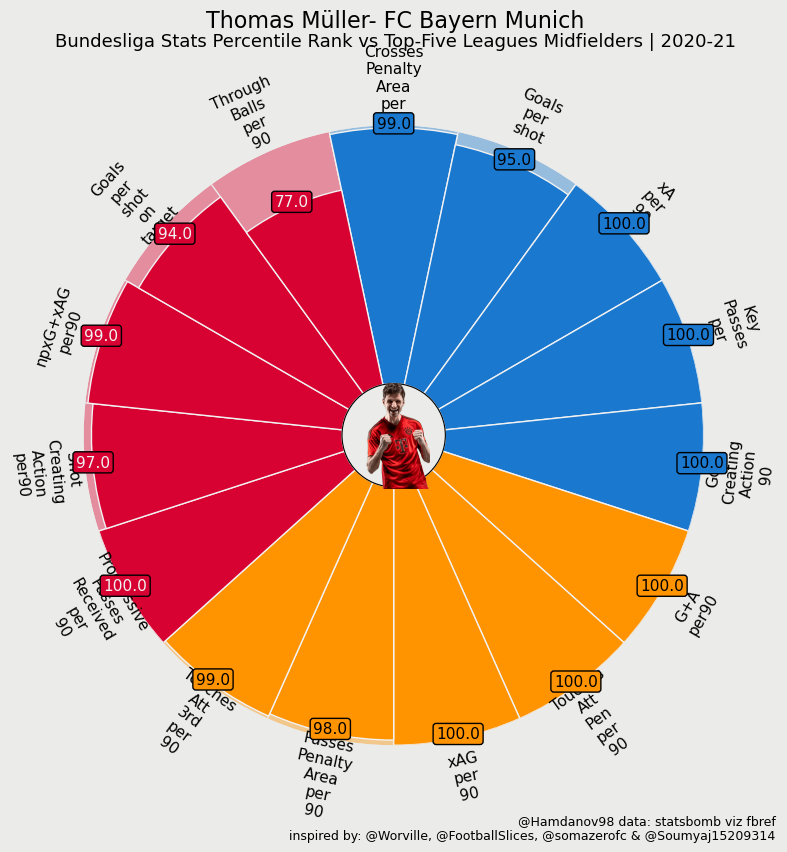

In [14]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    muller_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Thomas Müller- FC Bayern Munich", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Midfielders | 2020-21",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Muller_2021_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [15]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        player_2024[feature]=-player_2024[feature]
        player_2021[feature]=-player_2024[feature]

In [16]:
Muller_2021=player_2021[player_2021['Player']=='Thomas Müller']
Muller_2021

Unnamed: 0         Player  Nation Pos          Squad           Comp  \
215      1819.0  Thomas Müller  de GER  MF  Bayern Munich  de Bundesliga   

      Age    Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  \
215  30.0  1989.0  32.0    31.0  2674  29.7         0.37       1.01   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
215        0.34          0.98      0.27          0.61        0.25   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
215            0.59                36.0           27.0            75.0   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
215               9.0               25.0           62.73   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
215                    0.94                    5.99                   24.31   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
215                   32.93                     6.9   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
215                      62.69                       1.21   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
215                  0.91                      0.3           32.39   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
215                 134.28                                60.57   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
215                        1.72                1.89   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
215                          0.3                2.23                 1.62   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
215                    46.7                               10.94   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
215                        4.75                     0.94   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
215                   4.38                   0.03                  0.07   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
215               0.2                     0.07                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
215                   0.81                    0.0                  0.03   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
215              0.07                     0.03                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
215            1113.0            1539.0               72.3         16849.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
215          4499.0             572.0             700.0               81.7   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
215              393.0              531.0                74.0   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
215             76.0            135.0              56.3             0.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
215        0.34       0.43           0.3               3.13   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
215               2.93                        2.19   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
215                         0.57                       5.08   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
215                    51.82                    48.28   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
215                      3.3                     0.27                  0.13   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
215              0.3            3.13                    1.62   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
215                 0.27                     0.1                     0.03 

In [17]:
player_2024=player_2024[player_2024['Player']!='Thomas Müller']
player_2024=pd.concat([player_2024,Muller_2021])
player_2024=player_2024.reset_index(drop=True)
player_2024

Unnamed: 0                      Player   Nation Pos  \
0           5.0           Salis Abdul Samed   gh GHA  MF   
1           7.0             Laurent Abergel   fr FRA  MF   
2          28.0                 Yacine Adli   fr FRA  MF   
3          31.0            Michel Aebischer   ch SUI  MF   
4          62.0                Luis Alberto   es ESP  MF   
5          66.0               Rubén Alcaraz   es ESP  MF   
6          68.0                  Iván Alejo   es ESP  MF   
7          69.0                Carles Aleñá   es ESP  MF   
8          85.0               Edson Álvarez   mx MEX  MF   
9         108.0              Benjamin André   fr FRA  MF   
10        126.0            Oliver Arblaster  eng ENG  MF   
11        139.0           Maximilian Arnold   de GER  MF   
12        167.0             Neil El Aynaoui   fr FRA  MF   
13        173.0                Iddrisu Baba   gh GHA  MF   
14        178.0                Milan Badelj   hr CRO  MF   
15        189.0            Tiemoué Bakayoko   fr FRA  MF   
16        217.0              Nicolò Barella   it ITA  MF   
17        219.0                Ross Barkley  eng ENG  MF   
18        222.0    Leandro Barreiro Martins   lu LUX  MF   
19        223.0            Enzo Barrenechea   ar ARG  MF   
20        225.0               Pablo Barrios   es ESP  MF   
21        231.0                  Toma Bašić   hr CRO  MF   
22        265.0             Jude Bellingham  eng ENG  MF   
23        269.0                Fran Beltrán   es ESP  MF   
24        274.0            Carlos Benavídez   uy URU  MF   
25        275.0             Ismaël Bennacer   dz ALG  MF   
26        279.0              Nabil Bentaleb   dz ALG  MF   
27        280.0           Rodrigo Bentancur   uy URU  MF   
28        288.0                Sander Berge   no NOR  MF   
29        308.0              Philip Billing   dk DEN  MF   
30        313.0               Yves Bissouma   ml MLI  MF   
31        314.0        Leonardo Bittencourt   de GER  MF   
32        316.0              Antonio Blanco   es ESP  MF   
33        321.0                 Alexis Blin   fr FRA  MF   
34        333.0               Daniel Boloca   ro ROU  MF   
35        335.0         Giacomo Bonaventura   it ITA  MF   
36        337.0                Warren Bondo   fr FRA  MF   
37        357.0             Hicham Boudaoui   dz ALG  MF   
38        363.0                Edoardo Bove   it ITA  MF   
39        384.0           Marco Brescianini   it ITA  MF   
40        396.0              Josh Brownhill  eng ENG  MF   
41        422.0              Moisés Caicedo   ec ECU  MF   
42        423.0                 Tom Cairney  sct SCO  MF   
43        424.0                Jens Cajuste   se SWE  MF   
44        430.0            Hakan Çalhanoğlu   tr TUR  MF   
45        433.0               Lamine Camara   sn SEN  MF   
46        434.0                Mahdi Camara   fr FRA  MF   
47        435.0              Mohamed Camara   ml MLI  MF   
48        452.0              Étienne Capoue   fr FRA  MF   
49        456.0            Maxence Caqueret   fr FRA  MF   
50        464.0              Johnny Cardoso   us USA  MF   
51        484.0       Cristian Cásseres Jr.   ve VEN  MF   
52        493.0              Danilo Cataldi   it ITA  MF   
53        528.0            Pedro Chirivella   es ESP  MF   
54        531.0               Joris Chotard   fr FRA  MF   
55        535.0               Ryan Christie  sct SCO  MF   
56        539.0                  Pathé Ciss   sn SEN  MF   
57        547.0                Jordan Clark  eng ENG  MF   
58        563.0              Santi Comesaña   es ESP  MF   
59        569.0                  Lewis Cook  eng ENG  MF   
60        572.0            Francis Coquelin   fr FRA  MF   
61        585.0      David Pereira da Costa   pt POR  MF   
62        589.0                  Samu Costa   pt POR  MF   
63        593.0           Lassana Coulibaly   ml MLI  MF   
64        615.0                 Josh Cullen   ie IRL  MF   
65        632.0                      Danilo  

In [18]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [19]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [20]:
# Get Muller's row and compute cosine similarity
muller_2021_index = player_2024.index[player_2024['Player'] == 'Thomas Müller'][0]
muller_2021_data = transformed_df.loc[muller_2021_index].values.reshape(1, -1)

# Remove Muller from the dataset for comparison
transformed_df = transformed_df.drop(index=muller_2021_index)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, muller_2021_data).flatten()
transformed_df['similarity_to_muller_2021'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_muller_2021', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [22]:
# Visualize the results
player_2024['similarity_to_muller_2021'] = transformed_df['similarity_to_muller_2021']
player_2024_sorted = player_2024.sort_values(by='similarity_to_muller_2021', ascending=False)
player_2024_sorted

Unnamed: 0                      Player   Nation Pos  \
61        585.0      David Pereira da Costa   pt POR  MF   
144      1366.0            Teun Koopmeiners   nl NED  MF   
120      1147.0               Jonas Hofmann   de GER  MF   
67        655.0             Kevin De Bruyne   be BEL  MF   
258      2332.0                Oihan Sancet   es ESP  MF   
311      2776.0               Florian Wirtz   de GER  MF   
226      2072.0          Lorenzo Pellegrini   it ITA  MF   
212      1966.0                   Dani Olmo   es ESP  MF   
286      2577.0                 Teddy Teuma   mt MLT  MF   
195      1760.0             Takumi Minamino   jp JPN  MF   
94        931.0             Conor Gallagher  eng ENG  MF   
174      1565.0                  Arne Maier   de GER  MF   
323        50.0            Gianluca Gaetano   it ITA  MF   
271      2440.0                 Xavi Simons   nl NED  MF   
330        98.0                 Cole Palmer  eng ENG  MF   
22        265.0             Jude Bellingham  eng ENG  MF   
170      1551.0              James Maddison  eng ENG  MF   
126      1194.0                        Isco   es ESP  MF   
29        308.0              Philip Billing   dk DEN  MF   
198      1782.0                 Luka Modrić   hr CRO  MF   
46        434.0                Mahdi Camara   fr FRA  MF   
284      2540.0          Dominik Szoboszlai   hu HUN  MF   
4          62.0                Luis Alberto   es ESP  MF   
287      2585.0            Adrien Thomasson   fr FRA  MF   
227      2086.0             Andreas Pereira   br BRA  MF   
104      1014.0               Leon Goretzka   de GER  MF   
334       126.0              Jonathan Viera   es ESP  MF   
261      2349.0               Morgan Sanson   fr FRA  MF   
89        906.0             Davide Frattesi   it ITA  MF   
207      1891.0             Florian Neuhaus   de GER  MF   
280      2511.0                Kevin Stöger   at AUT  MF   
112      1070.0              İlkay Gündoğan   de GER  MF   
268      2393.0                  Alex Scott  eng ENG  MF   
317      2849.0             Martin Ødegaard   no NOR  MF   
197      1779.0          Henrikh Mkhitaryan   am ARM  MF   
263      2365.0               Téji Savanier   fr FRA  MF   
115      1094.0               Gustavo Hamer   nl NED  MF   
223      2045.0               Mario Pašalić   hr CRO  MF   
35        335.0         Giacomo Bonaventura   it ITA  MF   
238      2210.0           Tijjani Reijnders   nl NED  MF   
42        423.0                 Tom Cairney  sct SCO  MF   
92        916.0              Angelo Fulgini   fr FRA  MF   
189      1709.0               Marvin Mehlem   de GER  MF   
105      1018.0                 Mario Götze   de GER  MF   
230      2142.0              Julien Ponceau   fr FRA  MF   
315      2835.0             Piotr Zieliński   pl POL  MF   
187      1656.0             Pape Matar Sarr   sn SEN  MF   
308      2742.0           James Ward-Prowse  eng ENG  MF   
193      1748.0                 Lewis Miley  eng ENG  MF   
303      2691.0             Jordan Veretout   fr FRA  MF   
83        860.0              Lewis Ferguson  sct SCO  MF   
44        430.0            Hakan Çalhanoğlu   tr TUR  MF   
246      2251.0                       Rodri   es ESP  MF   
16        217.0              Nicolò Barella   it ITA  MF   
82        852.0              Jacopo Fazzini   it ITA  MF   
166      1531.0                Douglas Luiz   br BRA  MF   
329        89.0                James Mcatee  eng ENG  MF   
300      2668.0           Federico Valverde   uy URU  MF   
219      2022.0           Exequiel Palacios   ar ARG  MF   
208      1905.0                 Saúl Ñíguez   es ESP  MF   
242      2225.0                 Declan Rice  eng ENG  MF   
196      1771.0               Fabio Miretti   it ITA  MF   
247      2255.0              Dani Rodríguez   es ESP  MF   
66        640.0                Sergi Darder   es ESP  MF   
110      1062.0             Bruno Guimarães   br BRA  MF   
256      2323.0             Lazar Samardzic  

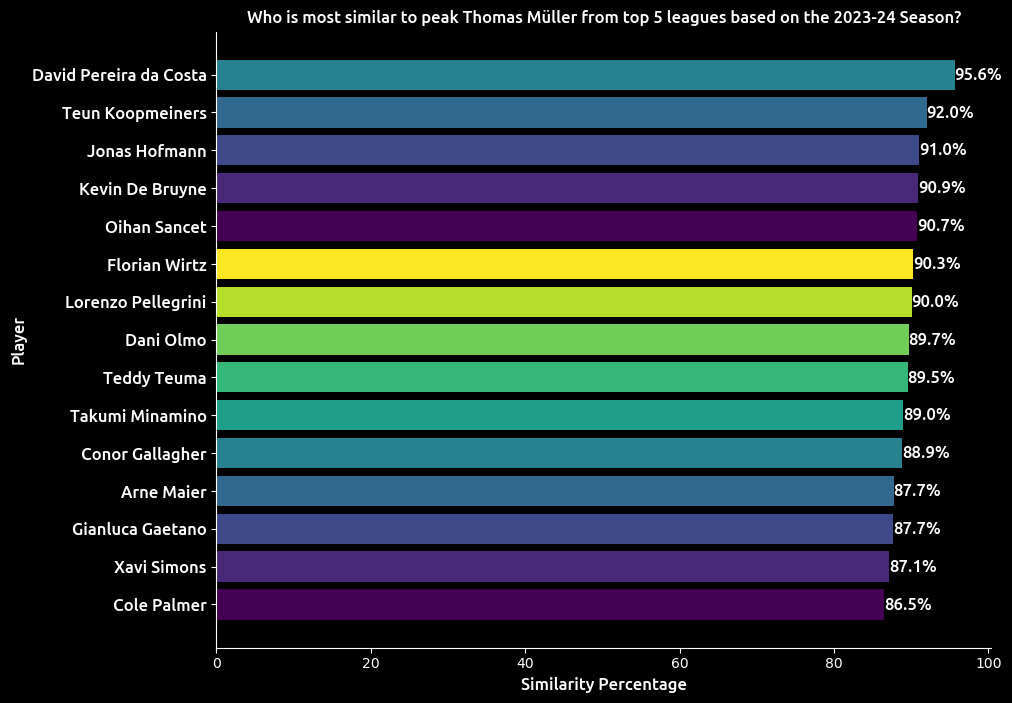

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_deligt_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_muller_2021', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_muller_2021'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to peak Thomas Müller from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [24]:
Olmo=player_2024[player_2024['Player']=='Dani Olmo']
Olmo

Unnamed: 0     Player  Nation Pos       Squad           Comp  Age  \
212      1966.0  Dani Olmo  es ESP  MF  RB Leipzig  de Bundesliga  0.0   

       Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
212  1998.0  21.0    17.0  1449  16.1         0.25       0.56        0.25   

     G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
212          0.56      0.21          0.55        0.21            0.55   

     Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
212                72.0           31.0            43.1              38.0   

     Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
212               52.8           53.04                    1.12   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
212                     7.2                   26.02                   20.43   

     Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
212                    3.66                      53.04   

     Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
212                       4.47                  1.93                     2.36   

     Carries_per_90  Total_Distance_per_90  \
212           33.79                  221.8   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
212                               119.57                        3.73   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
212                3.04                         1.12               -1.74   

     Dispossessed_per_90  Passes_Received_per_90  \
212                -1.61                   40.43   

     Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
212                                6.89                        3.79   

     Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
212                      0.5                   2.73                    0.0   

     Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
212                  0.19              0.56                     0.19   

     Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
212                   0.12                    0.5                    0.0   

     Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
212                   0.0               0.0                      0.0   

     Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
212                    0.0             511.0             657.0   

     Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
212               77.8          8589.0          2309.0             256.0   

     Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  \
212             306.0               83.7              187.0   

     Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  \
212              226.0                82.7             52.0             74.0   

     Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  \
212              70.3            0.31        0.34       0.23         -0.02   

     Key_Passes_per_90  Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
212               1.99               3.73                         1.3   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
212                         0.43                       4.22   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
212                    40.81                    39.69   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
212                     0.81                     0.56                  0.56   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
212             0.56             1.3                    0.25   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
212                  0.0                     0.0                      0.0   

     Str_Corner_Kicks_per_9

In [25]:
Pellegrini= player_2024[player_2024['Player']=='Lorenzo Pellegrini']
Pellegrini

Unnamed: 0              Player  Nation Pos Squad        Comp  Age  \
226      2072.0  Lorenzo Pellegrini  it ITA  MF  Roma  it Serie A  0.0   

       Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
226  1996.0  29.0    20.0  1859  20.7         0.39       0.53        0.34   

     G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
226          0.48      0.23          0.35        0.19            0.31   

     Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
226                38.0           19.0            50.0              16.0   

     Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
226               42.1           52.66                    1.11   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
226                    7.78                   28.07                   17.58   

     Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
226                    2.37                      52.61   

     Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
226                       1.84                  0.92                     0.77   

     Carries_per_90  Total_Distance_per_90  \
226           31.16                 197.63   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
226                                86.81                        2.08   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
226                1.74                         0.24               -2.03   

     Dispossessed_per_90  Passes_Received_per_90  \
226                -0.97                   37.29   

     Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
226                                4.69                        3.34   

     Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
226                     0.44                   1.93                   0.82   

     Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
226                  0.14              0.19                     0.19   

     Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
226                   0.05                   0.19                   0.05   

     Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
226                  0.05              0.05                      0.1   

     Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
226                    0.0             665.0             850.0   

     Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
226               78.2         10532.0          2994.0             347.0   

     Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  \
226             388.0               89.4              247.0   

     Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  \
226              293.0                84.3             47.0            108.0   

     Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  \
226              43.5            0.14        0.12       0.15          0.03   

     Key_Passes_per_90  Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
226               1.74               3.19                        1.06   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
226                         0.24                       4.54   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
226                    41.06                    37.63   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
226                     3.38                      1.3                  0.43   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
226             0.14            3.67                     0.1   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
226                 1.93                    0.92                     0.82   

     Str_Corner_Kicks_per_9

In [26]:
params = [
    'Goals_per90', 
    'Penalty_Kicks_Won_per_90', 
    'G+A_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xA_per_90', 
    'Shots_total_per90', 
    'G+A-PK_per90', 
    'npxG_per90', 
    'xG+xAG_per90', 
    'G-PK_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Guruzeta's stats from the percentile ranks DataFrame
olmo_percentile_ranks = round(players_percentile_ranks.iloc[[212]],0)

# Print the percentile ranks for Guruzeta
olmo_percentile_ranks

Goals_per90  Penalty_Kicks_Won_per_90  G+A_per90  \
212         93.0                      43.0       97.0   

     Carries_Penalty_Area_per_90  Shots_on_target_per90  \
212                         99.0                   95.0   

     Goal_Creating_Action_90  xA_per_90  Shots_total_per90  G+A-PK_per90  \
212                     91.0       94.0               99.0          98.0   

     npxG_per90  xG+xAG_per90  G-PK_per90  xG_per90  Goals_per_shot  \
212        94.0          97.0        96.0      90.0            71.0   

     Goals_per_shot_on_target  
212                      69.0

In [27]:
params = [
    'Goals_per90', 
    'Penalty_Kicks_Won_per_90', 
    'G+A_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xA_per_90', 
    'Shots_total_per90', 
    'G+A-PK_per90', 
    'npxG_per90', 
    'xG+xAG_per90', 
    'G-PK_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Guruzeta's stats from the percentile ranks DataFrame
pellegrini_percentile_ranks = round(players_percentile_ranks.iloc[[226]],0)

# Print the percentile ranks for Guruzeta
pellegrini_percentile_ranks

Goals_per90  Penalty_Kicks_Won_per_90  G+A_per90  \
226         98.0                      93.0       95.0   

     Carries_Penalty_Area_per_90  Shots_on_target_per90  \
226                         67.0                   97.0   

     Goal_Creating_Action_90  xA_per_90  Shots_total_per90  G+A-PK_per90  \
226                     86.0       79.0               93.0          95.0   

     npxG_per90  xG+xAG_per90  G-PK_per90  xG_per90  Goals_per_shot  \
226        92.0          88.0        98.0      93.0            90.0   

     Goals_per_shot_on_target  
226                      81.0

In [28]:
olmo_percentile_ranks_list = olmo_percentile_ranks.values.flatten().tolist()

olmo_percentile_ranks_list

[93.0,
 43.0,
 97.0,
 99.0,
 95.0,
 91.0,
 94.0,
 99.0,
 98.0,
 94.0,
 97.0,
 96.0,
 90.0,
 71.0,
 69.0]

In [29]:
pellegrini_percentile_ranks_list = pellegrini_percentile_ranks.values.flatten().tolist()

pellegrini_percentile_ranks_list

[98.0,
 93.0,
 95.0,
 67.0,
 97.0,
 86.0,
 79.0,
 93.0,
 95.0,
 92.0,
 88.0,
 98.0,
 93.0,
 90.0,
 81.0]

In [30]:
image_path = "Olmo.jpeg"
fdj_cropped = Image.open(image_path)


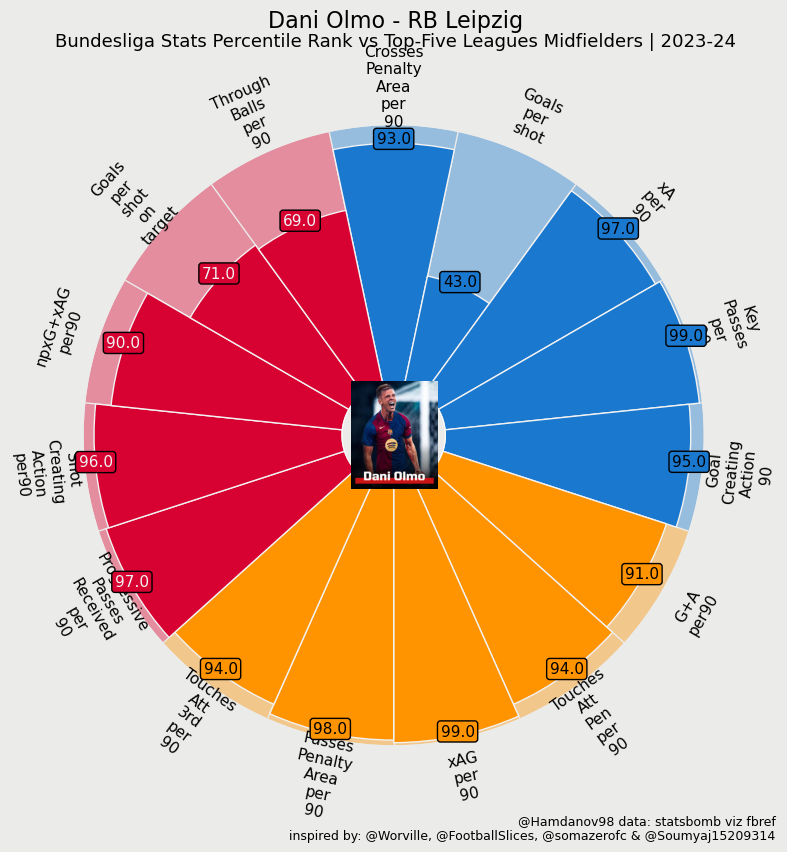

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    olmo_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Dani Olmo - RB Leipzig", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Midfielders | 2023-24",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Olmo_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [32]:
image_path = "Pellegrini.png"
fdj_cropped = Image.open(image_path)


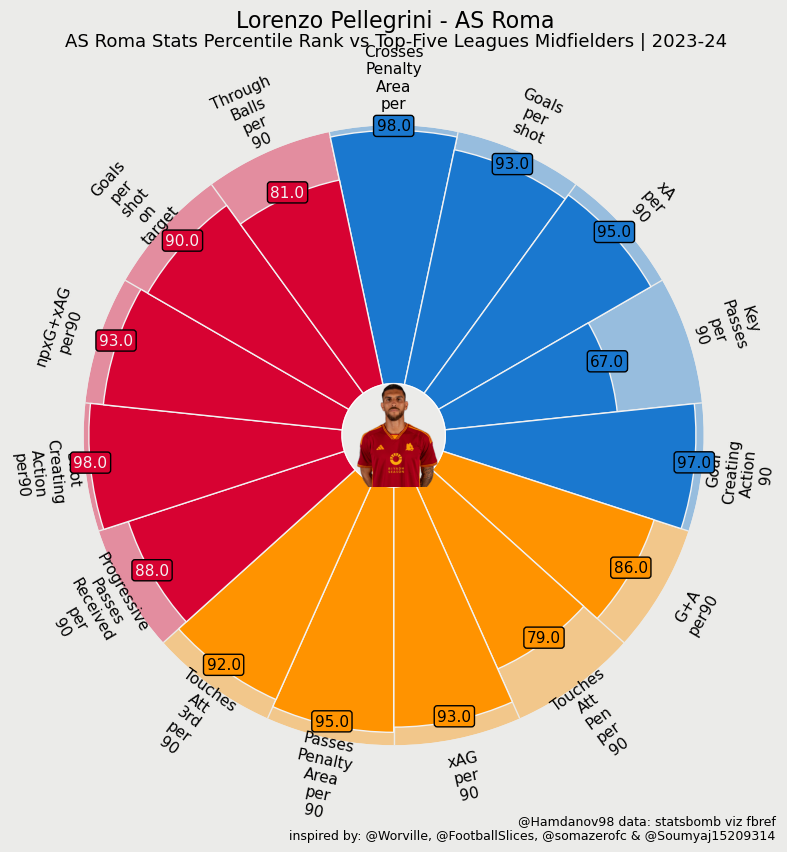

In [33]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    pellegrini_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Lorenzo Pellegrini - AS Roma", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"AS Roma Stats Percentile Rank vs Top-Five Leagues Midfielders | 2023-24",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Pellegrini_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png
